In [42]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import accuracy_score,f1_score, recall_score,precision_score
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree, svm
from sklearn.model_selection import cross_validate
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier,VotingClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn_evaluation import plot
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import zero_one_loss
import time
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

Australian: 30-70 proportion
Chess: 50-50 proportion
German: 30-70 proportion
Ionosphere: 64-36 proportion
Heart: 54-46 proportion
Hepatitis: 79-21 proportion
Housevote: 50-50 proportion
Wisconsin: 212/569 cancerous 357 bening

In [43]:
data = arff.loadarff('iris.arff')
df_iris = pd.DataFrame(data[0])

data = arff.loadarff('contact-lenses.arff')
df_lenses =  pd.DataFrame(data[0])

data = arff.loadarff('abalone9-18.arff')
df_abal = pd.DataFrame(data[0])

data = arff.loadarff('australian.arff')
df_australian = pd.DataFrame(data[0])


data = arff.loadarff('car.arff')
df_car  = pd.DataFrame(data[0])

data = arff.loadarff('chess.arff')
df_chess = pd.DataFrame(data[0])

data = arff.loadarff('german.arff')
df_german = pd.DataFrame(data[0])

data = arff.loadarff('glass.arff')
df_glass = pd.DataFrame(data[0])

data = arff.loadarff('heart.arff')
df_heart = pd.DataFrame(data[0])

data = arff.loadarff('hepatitis.arff')
df_hepa = pd.DataFrame(data[0])

data = arff.loadarff('housevotes.arff')
df_housevotes =  pd.DataFrame(data[0])

data = arff.loadarff('ionosphere.arff')
df_iono = pd.DataFrame(data[0])

data = arff.loadarff('tic-tac-toe.arff')
df_ttt = pd.DataFrame(data[0])

data = arff.loadarff('wine.arff')
df_wine = pd.DataFrame(data[0])

data = arff.loadarff('wisconsin.arff')
df_wiscon = pd.DataFrame(data[0])



In [44]:
#Formatting and splitting abalone
df_abal['Class'] = pd.factorize(df_abal['Class'])[0]
df_abal['Sex'] = pd.factorize(df_abal['Sex'])[0]
trainAbalone, testAbalone = train_test_split(df_abal, test_size=.25)
X_trainAbalone = trainAbalone.drop('Class', axis=1)
y_trainAbalone = trainAbalone['Class']
X_testAbalone = testAbalone.drop('Class', axis=1)
y_testAbalone = testAbalone['Class']

#Formatting and splitting australian
df_australian['Class'] = pd.factorize(df_australian['Class'])[0]
trainAustralian, testAustralian = train_test_split(df_australian, test_size=.25)
X_trainAustralian = trainAustralian.drop('Class', axis=1)
y_trainAustralian = trainAustralian['Class']
X_testAustralian = testAustralian.drop('Class', axis=1)
y_testAustralian = testAustralian['Class']


#Formatting and splitting car
df_car['Acceptability'] = pd.factorize(df_car['Acceptability'])[0]
df_car['Buying'] = pd.factorize(df_car['Buying'])[0]
df_car['Maint'] = pd.factorize(df_car['Maint'])[0]
df_car['Doors'] = pd.factorize(df_car['Doors'])[0]
df_car['Persons'] = pd.factorize(df_car['Persons'])[0]
df_car['Lug_boot'] = pd.factorize(df_car['Lug_boot'])[0]
df_car['Safety'] = pd.factorize(df_car['Safety'])[0]
trainCar, testCar = train_test_split(df_car, test_size=.25)
X_trainCar = trainCar.drop('Acceptability', axis=1)
y_trainCar = trainCar['Acceptability']
X_testCar = testCar.drop('Acceptability', axis=1)
y_testCar = testCar['Acceptability']

#Formatting and splitting chess
df_chess['Class'] = pd.factorize(df_chess['Class'])[0]
df_chess['Bkblk'] = pd.factorize(df_chess['Bkblk'])[0]
df_chess['Bknwy'] = pd.factorize(df_chess['Bknwy'])[0]
df_chess['Bkon8'] = pd.factorize(df_chess['Bkon8'])[0]
df_chess['Bkona'] = pd.factorize(df_chess['Bkona'])[0]
df_chess['Bkspr'] = pd.factorize(df_chess['Bkspr'])[0]
df_chess['Bkxbq'] = pd.factorize(df_chess['Bkxbq'])[0]
df_chess['Bkxcr'] = pd.factorize(df_chess['Bkxcr'])[0]
df_chess['Bkxwp'] = pd.factorize(df_chess['Bkxwp'])[0]
df_chess['Blxwp'] = pd.factorize(df_chess['Blxwp'])[0]
df_chess['Bxqsq'] = pd.factorize(df_chess['Bxqsq'])[0]
df_chess['Cntxt'] = pd.factorize(df_chess['Cntxt'])[0]
df_chess['Dsopp'] = pd.factorize(df_chess['Dsopp'])[0]
df_chess['Dwipd'] = pd.factorize(df_chess['Dwipd'])[0]
df_chess['Hdchk'] = pd.factorize(df_chess['Hdchk'])[0]
df_chess['Katri5'] = pd.factorize(df_chess['Katri5'])[0]
df_chess['Mulch'] = pd.factorize(df_chess['Mulch'])[0]
df_chess['Qxmsq'] = pd.factorize(df_chess['Qxmsq'])[0]
df_chess['R2ar8'] = pd.factorize(df_chess['R2ar8'])[0]
df_chess['Reskd'] = pd.factorize(df_chess['Reskd'])[0]
df_chess['Reskr'] = pd.factorize(df_chess['Reskr'])[0]
df_chess['Rimmx'] = pd.factorize(df_chess['Rimmx'])[0]
df_chess['Rkxwp'] = pd.factorize(df_chess['Rkxwp'])[0]
df_chess['Rxmsq'] = pd.factorize(df_chess['Rxmsq'])[0]
df_chess['Simpl'] = pd.factorize(df_chess['Simpl'])[0]
df_chess['Skach'] = pd.factorize(df_chess['Skach'])[0]
df_chess['Skewr'] = pd.factorize(df_chess['Skewr'])[0]
df_chess['Skrxp'] = pd.factorize(df_chess['Skrxp'])[0]
df_chess['Spcop'] = pd.factorize(df_chess['Spcop'])[0]
df_chess['Stlmt'] = pd.factorize(df_chess['Stlmt'])[0]
df_chess['Thrsk'] = pd.factorize(df_chess['Thrsk'])[0]
df_chess['Wkcti'] = pd.factorize(df_chess['Wkcti'])[0]
df_chess['Wkna8'] = pd.factorize(df_chess['Wkna8'])[0]
df_chess['Wknck'] = pd.factorize(df_chess['Wknck'])[0]
df_chess['Wkovl'] = pd.factorize(df_chess['Wkovl'])[0]
df_chess['Wkpos'] = pd.factorize(df_chess['Wkpos'])[0]
df_chess['Wtoeg'] = pd.factorize(df_chess['Wtoeg'])[0]
trainChess, testChess = train_test_split(df_chess, test_size=.25)
X_trainChess = trainChess.drop('Class', axis=1)
y_trainChess = trainChess['Class']
X_testChess = testChess.drop('Class', axis=1)
y_testChess = testChess['Class']

# Changing the last categorical class value into a numerical value
df_german['Customer'] = pd.factorize(df_german['Customer'])[0]
df_german['Customer'] = pd.factorize(df_german['Customer'])[0]
df_german['StatusAccount'] = pd.factorize(df_german['StatusAccount'])[0]
df_german['CreditHistory'] = pd.factorize(df_german['CreditHistory'])[0]
df_german['Purpose'] = pd.factorize(df_german['Purpose'])[0]
df_german['SavingsAccount'] = pd.factorize(df_german['SavingsAccount'])[0]
df_german['EmploymentSince'] = pd.factorize(df_german['EmploymentSince'])[0]
df_german['StatusAndSex'] = pd.factorize(df_german['StatusAndSex'])[0]
df_german['Guarantors'] = pd.factorize(df_german['Guarantors'])[0]
df_german['Property'] = pd.factorize(df_german['Property'])[0]
df_german['InstallmentPlans'] = pd.factorize(df_german['InstallmentPlans'])[0]
df_german['Housing'] = pd.factorize(df_german['Housing'])[0]
df_german['Job'] = pd.factorize(df_german['Job'])[0]
df_german['Telephone'] = pd.factorize(df_german['Telephone'])[0]
df_german['ForeignWorker'] = pd.factorize(df_german['ForeignWorker'])[0]
trainGerman, testGerman = train_test_split(df_german, test_size=.25)
X_trainGerman = trainGerman.drop('Customer', axis=1)
y_trainGerman = trainGerman['Customer']
X_testGerman = testGerman.drop('Customer', axis=1)
y_testGerman = testGerman['Customer']

# Changing the last categorical class value into a numerical value
df_glass['TypeGlass'] = pd.factorize(df_glass['TypeGlass'])[0]
trainGlass, testGlass = train_test_split(df_glass, test_size=.25)
X_trainGlass = trainGlass.drop('TypeGlass', axis=1)
y_trainGlass = trainGlass['TypeGlass']
X_testGlass = testGlass.drop('TypeGlass', axis=1)
y_testGlass = testGlass['TypeGlass']

# Changing the last categorical class value into a numerical value
df_iono['class'] = pd.factorize(df_iono['class'])[0]
trainIono, testIono = train_test_split(df_iono, test_size=.25)
X_trainIono = trainIono.drop('class', axis=1)
y_trainIono = trainIono['class']
X_testIono = testIono.drop('class', axis=1)
y_testIono = testIono['class']

df_iris['class'] = pd.factorize(df_iris['class'])[0]
trainIris, testIris = train_test_split(df_iris, test_size=.25)
X_trainIris = trainIris.drop('class', axis=1)
y_trainIris = trainIris['class']
X_testIris = testIris.drop('class', axis=1)
y_testIris = testIris['class']

# Changing the last categorical class value into a numerical value
df_heart['Class'] = pd.factorize(df_heart['Class'])[0]
trainHeart, testHeart = train_test_split(df_heart, test_size=.25)
X_trainHeart = trainHeart.drop('Class', axis=1)
y_trainHeart = trainHeart['Class']
X_testHeart = testHeart.drop('Class', axis=1)
y_testHeart = testHeart['Class']

# Changing the last categorical class value into a numerical value
df_hepa['Class'] = pd.factorize(df_hepa['Class'])[0]
trainHepatitis, testHepatitis = train_test_split(df_hepa, test_size=.25)
X_trainHepatitis = trainHepatitis.drop('Class', axis=1)
y_trainHepatitis = trainHepatitis['Class']
X_testHepatitis = testHepatitis.drop('Class', axis=1)
y_testHepatitis = testHepatitis['Class']

# Changing the last categorical class value into a numerical value
df_housevotes['Class'] = pd.factorize(df_housevotes['Class'])[0]
df_housevotes['Class'] = pd.factorize(df_housevotes['Class'])[0]
df_housevotes['Handicapped_infants'] = pd.factorize(df_housevotes['Handicapped_infants'])[0]
df_housevotes['Water_project_cost'] = pd.factorize(df_housevotes['Water_project_cost'])[0]
df_housevotes['Adoption_budget_resolution'] = pd.factorize(df_housevotes['Adoption_budget_resolution'])[0]
df_housevotes['Physician_fee_freeze'] = pd.factorize(df_housevotes['Physician_fee_freeze'])[0]
df_housevotes['El_salvador_aid'] = pd.factorize(df_housevotes['El_salvador_aid'])[0]
df_housevotes['Religious_groups_in_schools'] = pd.factorize(df_housevotes['Religious_groups_in_schools'])[0]
df_housevotes['Anti_satellite_test_ban'] = pd.factorize(df_housevotes['Anti_satellite_test_ban'])[0]
df_housevotes['Aid_to_nicaraguan_contras'] = pd.factorize(df_housevotes['Aid_to_nicaraguan_contras'])[0]
df_housevotes['Mx_missile'] = pd.factorize(df_housevotes['Mx_missile'])[0]
df_housevotes['Immigration'] = pd.factorize(df_housevotes['Immigration'])[0]
df_housevotes['Synfuels_corporation_cutback'] = pd.factorize(df_housevotes['Synfuels_corporation_cutback'])[0]
df_housevotes['Education_spending'] = pd.factorize(df_housevotes['Education_spending'])[0]
df_housevotes['Superfund_right_to_sue'] = pd.factorize(df_housevotes['Superfund_right_to_sue'])[0]
df_housevotes['Crime'] = pd.factorize(df_housevotes['Crime'])[0]
df_housevotes['Duty_free_exports'] = pd.factorize(df_housevotes['Duty_free_exports'])[0]
df_housevotes['Export_south_africa'] = pd.factorize(df_housevotes['Export_south_africa'])[0]
trainHousevotes, testHousevotes = train_test_split(df_housevotes, test_size=.25)
X_trainHousevotes = trainHousevotes.drop('Class', axis=1)
y_trainHousevotes = trainHousevotes['Class']
X_testHousevotes = testHousevotes.drop('Class', axis=1)
y_testHousevotes = testHousevotes['Class']

# Changing the last categorical class value into a numerical value
# Changing the last categorical class value into a numerical value
df_ttt['Class'] = pd.factorize(df_ttt['Class'])[0]
df_ttt['TopLeft'] = pd.factorize(df_ttt['TopLeft'])[0]
df_ttt['TopMiddle'] = pd.factorize(df_ttt['TopMiddle'])[0]
df_ttt['TopRight'] = pd.factorize(df_ttt['TopRight'])[0]
df_ttt['MiddleLeft'] = pd.factorize(df_ttt['MiddleLeft'])[0]
df_ttt['MiddleMiddle'] = pd.factorize(df_ttt['MiddleMiddle'])[0]
df_ttt['MiddleRight'] = pd.factorize(df_ttt['MiddleRight'])[0]
df_ttt['BottomLeft'] = pd.factorize(df_ttt['BottomLeft'])[0]
df_ttt['BottomMiddle'] = pd.factorize(df_ttt['BottomMiddle'])[0]
df_ttt['BottomRight'] = pd.factorize(df_ttt['BottomRight'])[0]
trainTtt, testTtt = train_test_split(df_ttt, test_size=.25)
X_trainTtt = trainTtt.drop('Class', axis=1)
y_trainTtt = trainTtt['Class']
X_testTtt = testTtt.drop('Class', axis=1)
y_testTtt = testTtt['Class']

# Changing the last categorical class value into a numerical value
df_wine['Class'] = pd.factorize(df_wine['Class'])[0]
trainWine, testWine = train_test_split(df_wine, test_size=.25)
X_trainWine = trainWine.drop('Class', axis=1)
y_trainWine = trainWine['Class']
X_testWine = testWine.drop('Class', axis=1)
y_testWine = testWine['Class']

# Changing the last categorical class value into a numerical value
df_wiscon['Class'] = pd.factorize(df_wiscon['Class'])[0]
trainWisconsin, testWisconsin = train_test_split(df_wiscon, test_size=.25)
X_trainWisconsin = trainWisconsin.drop('Class', axis=1)
y_trainWisconsin = trainWisconsin['Class']
X_testWisconsin = testWisconsin.drop('Class', axis=1)
y_testWisconsin = testWisconsin['Class']

domains = ['Australian (0.3)','Chess (0)','German (0.7)','Ionosphere (0.36)','Heart (0.46)','Hepatitis (0.21)','Housevotes (0)','tic-tac-toe (0)','Wisconsin (0.59)']
imbalance_ratios = [ 0.3, 0, 0.7, 0.36, 0.46, 0.21, 0, 0, 1.68]
data = [
    ('Australian',X_trainAustralian,y_trainAustralian,X_testAustralian,y_testAustralian),
    ('Chess',X_trainChess,y_trainChess,X_testChess,y_testChess),
    ('German',X_trainGerman,y_trainGerman,X_testGerman,y_testGerman),
    ('Ionosphere',X_trainIono,y_trainIono,X_testIono,y_testIono),
    ('Heart',X_trainHeart,y_trainHeart,X_testHeart,y_testHeart),
    ('Hepatitis',X_trainHepatitis,y_trainHepatitis,X_testHepatitis,y_testHepatitis),
    ('Housevotes',X_trainHousevotes,y_trainHousevotes,X_testHousevotes,y_testHousevotes),
    ('tic-tac-toe',X_trainTtt,y_trainTtt,X_testTtt,y_testTtt),
    ('Wisconsin',X_trainWisconsin,y_trainWisconsin,X_testWisconsin,y_testWisconsin)
    ]

# 1. Elija tres métricas de las estudiadas en teoría para evaluar el rendimiento de los métodos en problemas condesequilibrio de clase. Elija, al menos, dos clasificadores diferentes. En primer lugar vamos a comparar el efecto del desequilibrio de clases en estos dos clasificadores. Estudie el error con las métricas escogidas y obtenga las conclusiones que observe sobre el efecto del desequilibrio.

He elegido precision, recall y error rate.

In [45]:
rf = RandomForestClassifier()
dt_model = DecisionTreeClassifier()

In [46]:
recallRf = []
precisionRf = []
accuracyRf = []
errorRateRf = []
for i in data:
    print(i[0])
        # code that may raise an exception
    rf.fit(i[1],i[2])
    prediction = rf.predict(i[3])
    recall = recall_score(i[4], prediction, average='macro')



    precision = precision_score(i[4], prediction)

        # Calculate accuracy
    acc = accuracy_score(i[4], prediction)


    print("Random forest application of: ",i[0])
    print("Recall ", recall)
    recallRf.append(recall)
    print("Precision: ",precision)
    print("Accuracy: ", acc)
    accuracyRf.append(acc)
    precisionRf.append(precision)
    errorRateRf.append(1-acc)

Australian
Random forest application of:  Australian
Recall  0.8925791733762748
Precision:  0.9315068493150684
Accuracy:  0.8959537572254336
Chess
Random forest application of:  Chess
Recall  0.9839488369176751
Precision:  0.9925558312655087
Accuracy:  0.983729662077597
German
Random forest application of:  German
Recall  0.6855493133583022
Precision:  0.6538461538461539
Accuracy:  0.776
Ionosphere
Random forest application of:  Ionosphere
Recall  0.9352678571428572
Precision:  0.9354838709677419
Accuracy:  0.9431818181818182
Heart
Random forest application of:  Heart
Recall  0.7913279132791329
Precision:  0.8461538461538461
Accuracy:  0.7941176470588235
Hepatitis
Random forest application of:  Hepatitis
Recall  0.71875
Precision:  0.6666666666666666
Accuracy:  0.85
Housevotes
Random forest application of:  Housevotes
Recall  0.9495192307692308
Precision:  0.9259259259259259
Accuracy:  0.9482758620689655
tic-tac-toe
Random forest application of:  tic-tac-toe
Recall  0.9883720930232558


In [47]:
recalldt = []
precisiondt= []
accuracydt= []
errorRatedt = []
for i in data:
    print(i[0])
    # code that may raise an exception
    dt_model.fit(i[1], i[2])
    prediction = dt_model.predict(i[3])
    recall = recall_score(i[4], prediction, average='macro')

    precision = precision_score(i[4],prediction)

    # Calculate accuracy
    acc = accuracy_score(i[4], prediction)

    print("Decision Tree application of: ", i[0])
    print("Recall ", recall)
    recalldt.append(recall)
    print("Precision: ", precision)
    print("Accuracy: ", acc)
    accuracydt.append(acc)
    precisiondt.append(precision)
    errorRatedt.append(1-acc)


Australian
Decision Tree application of:  Australian
Recall  0.8142780461621042
Precision:  0.8024691358024691
Accuracy:  0.815028901734104
Chess
Decision Tree application of:  Chess
Recall  0.9886293811524234
Precision:  0.9854721549636803
Accuracy:  0.9887359198998749
German
Decision Tree application of:  German
Recall  0.6306960049937578
Precision:  0.4666666666666667
Accuracy:  0.692
Ionosphere
Decision Tree application of:  Ionosphere
Recall  0.9263392857142857
Precision:  0.90625
Accuracy:  0.9318181818181818
Heart
Decision Tree application of:  Heart
Recall  0.7669376693766938
Precision:  0.8378378378378378
Accuracy:  0.7647058823529411
Hepatitis
Decision Tree application of:  Hepatitis
Recall  0.53125
Precision:  0.25
Accuracy:  0.7
Housevotes
Decision Tree application of:  Housevotes
Recall  0.9266826923076923
Precision:  0.9583333333333334
Accuracy:  0.9310344827586207
tic-tac-toe
Decision Tree application of:  tic-tac-toe
Recall  0.9340078526125037
Precision:  0.928571428571

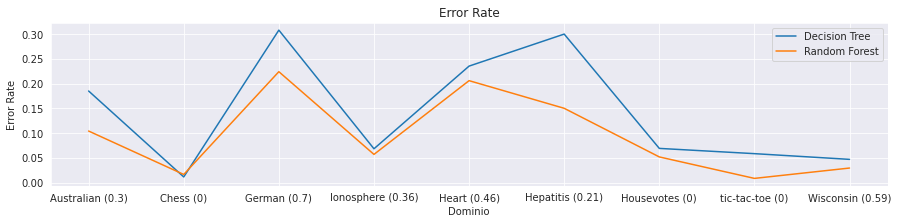

In [48]:

# Create a line chart with two series of data
plt.figure(figsize=(15,3))
plt.plot(errorRatedt, label='Decision Tree')
plt.plot(errorRateRf, label='Random Forest')

# Add a title and axis labels
plt.title('Error Rate')
plt.xlabel('Dominio')
plt.ylabel('Error Rate')


# Set the x-axis ticks and labels
plt.xticks(range(len(domains)), domains)

# Add a legend
plt.legend()

# Show the chart
plt.show()

 Con esta tabla podemos observar que aquellos dominios sin desbalanceo son los que tienen el ratio más bajo de error (Chess, Housevotes, tictactoe), y en el momento que metes algo de desbalanceo el error aumenta. El único caso que obtiene un buen resultado con desbalanceo es Wisconsin, que obtiene muy poco error a pesar del desbalanceo (el mayor de todos)

# 2. Estudio de las dos técnicas básicas. Implemente, o use, las técnicas de over-sampling y under-sampling. Aplique estas dos técnicas a los conjuntos de datos seleccionados y estudie cómo se comportan para cada uno de los dos modelos de clasificación. Indique las ventajas e inconvenientes que observa en cada una de ellas.

In [49]:
recallRfOver = []
precisionRfOver = []
accuracyRfOver = []
errorRateRfOver = []
for i in data:
    oversampler = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = oversampler.fit_resample(i[1], i[2])

    rf.fit(X_train_resampled,y_train_resampled)
    prediction = rf.predict(i[3])
    recall = recall_score(i[4], prediction, average='macro')



    precision = precision_score(i[4], prediction)

        # Calculate accuracy
    acc = accuracy_score(i[4], prediction)


    print("Random forest application of: ",i[0])
    print("Recall ", recall)
    recallRfOver.append(recall)
    print("Precision: ",precision)
    print("Accuracy: ", acc)
    accuracyRfOver.append(acc)
    precisionRfOver.append(precision)
    errorRateRfOver.append(1-acc)

Random forest application of:  Australian
Recall  0.9157944176060118
Precision:  0.958904109589041
Accuracy:  0.9190751445086706
Random forest application of:  Chess
Recall  0.987541538654461
Precision:  0.9901960784313726
Accuracy:  0.9874843554443054
Random forest application of:  German
Recall  0.6837546816479401
Precision:  0.5571428571428572
Accuracy:  0.744
Random forest application of:  Ionosphere
Recall  0.9419642857142857
Precision:  0.9090909090909091
Accuracy:  0.9431818181818182
Random forest application of:  Heart
Recall  0.8035230352303523
Precision:  0.85
Accuracy:  0.8088235294117647
Random forest application of:  Hepatitis
Recall  0.6875
Precision:  0.5
Accuracy:  0.8
Random forest application of:  Housevotes
Recall  0.9495192307692308
Precision:  0.9259259259259259
Accuracy:  0.9482758620689655
Random forest application of:  tic-tac-toe
Recall  0.9883720930232558
Precision:  1.0
Accuracy:  0.9916666666666667
Random forest application of:  Wisconsin
Recall  0.973495911

In [50]:
recalldtOver = []
precisiondtOver = []
accuracydtOver = []
errorRatedtOver = []
for i in data:
    oversampler = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = oversampler.fit_resample(i[1], i[2])

    dt_model.fit(X_train_resampled,y_train_resampled)
    prediction =dt_model.predict(i[3])
    recall = recall_score(i[4], prediction, average='macro')



    precision = precision_score(i[4], prediction)

        # Calculate accuracy
    acc = accuracy_score(i[4], prediction)


    print("Decision Tree application of: ",i[0])
    print("Recall ", recall)
    recalldtOver.append(recall)
    print("Precision: ",precision)
    print("Accuracy: ", acc)
    accuracydtOver.append(acc)
    precisiondtOver.append(precision)
    errorRatedtOver.append(1-acc)

Decision Tree application of:  Australian
Recall  0.8491009125067096
Precision:  0.8395061728395061
Accuracy:  0.8497109826589595
Decision Tree application of:  Chess
Recall  0.9886293811524234
Precision:  0.9854721549636803
Accuracy:  0.9887359198998749
Decision Tree application of:  German
Recall  0.6569912609238452
Precision:  0.4819277108433735
Accuracy:  0.7
Decision Tree application of:  Ionosphere
Recall  0.8705357142857143
Precision:  0.8666666666666667
Accuracy:  0.8863636363636364
Decision Tree application of:  Heart
Recall  0.7362240289069557
Precision:  0.8108108108108109
Accuracy:  0.7352941176470589
Decision Tree application of:  Hepatitis
Recall  0.53125
Precision:  0.25
Accuracy:  0.7
Decision Tree application of:  Housevotes
Recall  0.9266826923076923
Precision:  0.9583333333333334
Accuracy:  0.9310344827586207
Decision Tree application of:  tic-tac-toe
Recall  0.9714587737843552
Precision:  0.9239130434782609
Accuracy:  0.9666666666666667
Decision Tree application of:

In [51]:
recallRfUnder = []
precisionRfUnder = []
accuracyRfUnder = []
errorRateRfUnder = []
for i in data:
    undersampler = RandomUnderSampler(random_state=42)
    X_train_resampled, y_train_resampled = undersampler.fit_resample(i[1], i[2])

    rf.fit(X_train_resampled,y_train_resampled)
    prediction = rf.predict(i[3])
    recall = recall_score(i[4], prediction, average='macro')



    precision= precision_score(i[4], prediction)

        # Calculate accuracy
    acc = accuracy_score(i[4], prediction)


    print("Random forest application of: ",i[0])
    print("Recall ", recall)
    recallRfUnder.append(recall)
    print("Precision: ",precision)
    print("Accuracy: ", acc)
    accuracyRfUnder.append(acc)
    precisionRfUnder.append(precision)
    errorRateRfUnder.append(1-acc)

Random forest application of:  Australian
Recall  0.8994900697799249
Precision:  0.9210526315789473
Accuracy:  0.9017341040462428
Random forest application of:  Chess
Recall  0.9888268856981629
Precision:  0.9926289926289926
Accuracy:  0.9887359198998749
Random forest application of:  German
Recall  0.7038077403245943
Precision:  0.48148148148148145
Accuracy:  0.696
Random forest application of:  Ionosphere
Recall  0.9330357142857143
Precision:  0.8823529411764706
Accuracy:  0.9318181818181818
Random forest application of:  Heart
Recall  0.8035230352303523
Precision:  0.85
Accuracy:  0.8088235294117647
Random forest application of:  Hepatitis
Recall  0.71875
Precision:  0.375
Accuracy:  0.7
Random forest application of:  Housevotes
Recall  0.9495192307692308
Precision:  0.9259259259259259
Accuracy:  0.9482758620689655
Random forest application of:  tic-tac-toe
Recall  0.9844457867713682
Precision:  0.9659090909090909
Accuracy:  0.9833333333333333
Random forest application of:  Wisconsi

In [52]:
recalldtUnder = []
precisiondtUnder = []
accuracydtUnder = []
errorRatedtUnder = []
for i in data:
    X_train_resampled, y_train_resampled = undersampler.fit_resample(i[1], i[2])

    dt_model.fit(X_train_resampled,y_train_resampled)
    prediction =dt_model.predict(i[3])
    recall = recall_score(i[4], prediction, average='macro')



    precision = precision_score(i[4], prediction)

        # Calculate accuracy
    acc = accuracy_score(i[4], prediction)


    print("Decision Tree application of: ",i[0])
    print("Recall ", recall)
    recalldtUnder.append(recall)
    print("Precision: ",precision)
    print("Accuracy: ", acc)
    accuracydtUnder.append(acc)
    precisiondtUnder.append(precision)
    errorRatedtUnder.append(1-acc)

Decision Tree application of:  Australian
Recall  0.7957595276435856
Precision:  0.7948717948717948
Accuracy:  0.7976878612716763
Decision Tree application of:  Chess
Recall  0.9924854222835288
Precision:  0.9926829268292683
Accuracy:  0.9924906132665833
Decision Tree application of:  German
Recall  0.6439606741573034
Precision:  0.42857142857142855
Accuracy:  0.652
Decision Tree application of:  Ionosphere
Recall  0.8526785714285714
Precision:  0.8125
Accuracy:  0.8636363636363636
Decision Tree application of:  Heart
Recall  0.7664859981933152
Precision:  0.8095238095238095
Accuracy:  0.7794117647058824
Decision Tree application of:  Hepatitis
Recall  0.59375
Precision:  0.2857142857142857
Accuracy:  0.65
Decision Tree application of:  Housevotes
Recall  0.9266826923076923
Precision:  0.9583333333333334
Accuracy:  0.9310344827586207
Decision Tree application of:  tic-tac-toe
Recall  0.911280579885231
Precision:  0.8571428571428571
Accuracy:  0.9125
Decision Tree application of:  Wisco

# 4. Compare gráficamente los resultados más significativos de los ejercicios anteriores usando cualquiera de las representaciones gráficas que conozca.

## Error rate normal vs undersampling vs oversampling

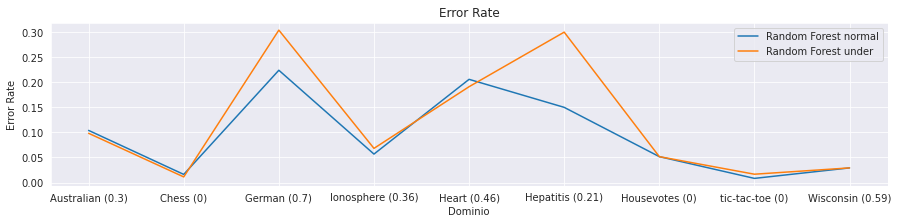

In [53]:
# Create a line chart with two series of data
plt.figure(figsize=(15,3))
plt.plot(errorRateRf, label='Random Forest normal')
plt.plot(errorRateRfUnder,label='Random Forest under')


# Add a title and axis labels
plt.title('Error Rate')
plt.xlabel('Dominio')
plt.ylabel('Error Rate')


# Set the x-axis ticks and labels
plt.xticks(range(len(domains)), domains)

# Add a legend
plt.legend()

# Show the chart
plt.show()

Undersamplng tan solo obtiene mejores resultados con Random Forest en ionosphere, housevotes (sin desbalanceo), tictactoe y wisconsin, (3/4 son desbalanceadas)

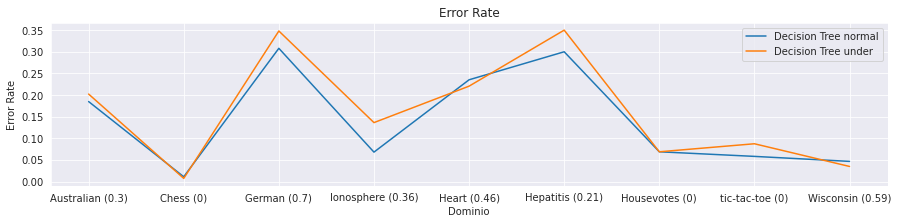

In [54]:
# Create a line chart with two series of data
plt.figure(figsize=(15,3))
plt.plot(errorRatedt, label='Decision Tree normal')
plt.plot(errorRatedtUnder,label='Decision Tree under')


# Add a title and axis labels
plt.title('Error Rate')
plt.xlabel('Dominio')
plt.ylabel('Error Rate')


# Set the x-axis ticks and labels
plt.xticks(range(len(domains)), domains)

# Add a legend
plt.legend()

# Show the chart
plt.show()

Con decision tree, undersampling solo mejora en 1 dominio, Heart. La clase está solo ligeramente desbalanceada.

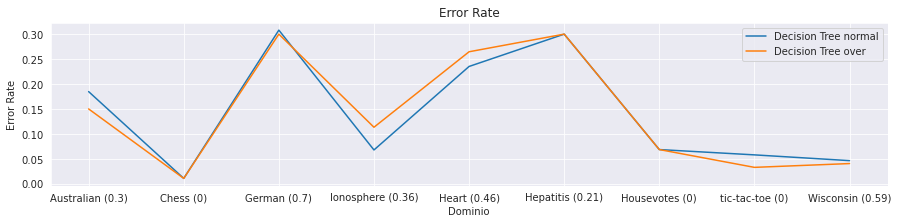

In [55]:
# Create a line chart with two series of data
plt.figure(figsize=(15,3))
plt.plot(errorRatedt, label='Decision Tree normal')
plt.plot(errorRatedtOver,label='Decision Tree over')

# Add a title and axis labels
plt.title('Error Rate')
plt.xlabel('Dominio')
plt.ylabel('Error Rate')


# Set the x-axis ticks and labels
plt.xticks(range(len(domains)), domains)

# Add a legend
plt.legend()

# Show the chart
plt.show()

Oversampling, sin embargo, consigue casi siempre resultados iguales o mejores en todos los dominios salvo en uno (Australian)

## Precision normal vs oversampling vs undersampling

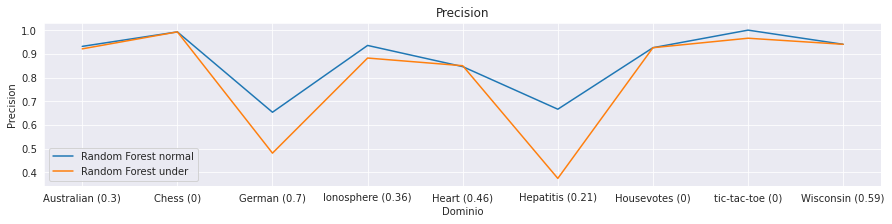

In [56]:
# Create a line chart with two series of data
plt.figure(figsize=(15,3))

plt.plot(precisionRf, label='Random Forest normal')
plt.plot(precisionRfUnder,label='Random Forest under')


# Add a title and axis labels
plt.title('Precision')
plt.xlabel('Dominio')
plt.ylabel('Precision')


# Set the x-axis ticks and labels
plt.xticks(range(len(domains)), domains)

# Add a legend
plt.legend()

# Show the chart
plt.show()

En random forest, undersampling siempre es igual o menor, de hecho en algunos casos si el desbalanceo es grande baja mucho.

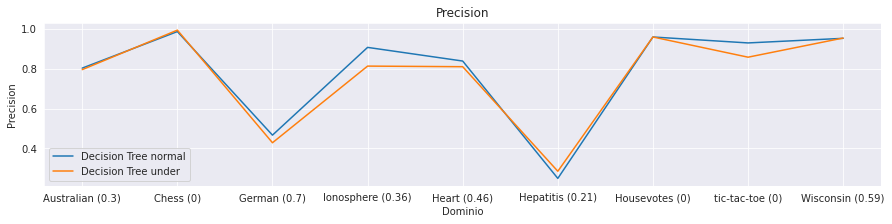

In [57]:
# Create a line chart with two series of data
plt.figure(figsize=(15,3))

plt.plot(precisiondt, label='Decision Tree normal')
plt.plot(precisiondtUnder,label='Decision Tree under')


# Add a title and axis labels
plt.title('Precision')
plt.xlabel('Dominio')
plt.ylabel('Precision')


# Set the x-axis ticks and labels
plt.xticks(range(len(domains)), domains)

# Add a legend
plt.legend()

# Show the chart
plt.show()

Con decision tree la precisión es similar entre el under sampling y el oversampling, aunque es ligeramente inferior en distintos dominios

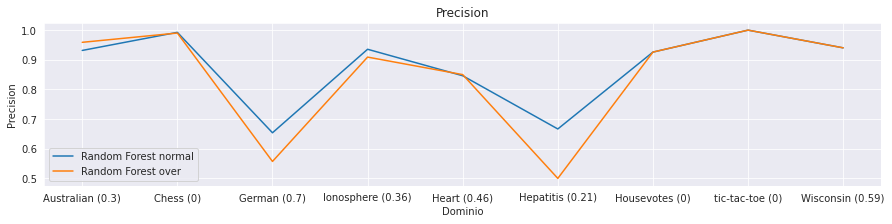

In [58]:
# Create a line chart with two series of data
plt.figure(figsize=(15,3))

plt.plot(precisionRf, label='Random Forest normal')
plt.plot(precisionRfOver,label='Random Forest over')


# Add a title and axis labels
plt.title('Precision')
plt.xlabel('Dominio')
plt.ylabel('Precision')


# Set the x-axis ticks and labels
plt.xticks(range(len(domains)), domains)

# Add a legend
plt.legend()

# Show the chart
plt.show()

El oversampling no consigue mejores resultados en precisión con decision tree salvo en 1 dominio (Australian)

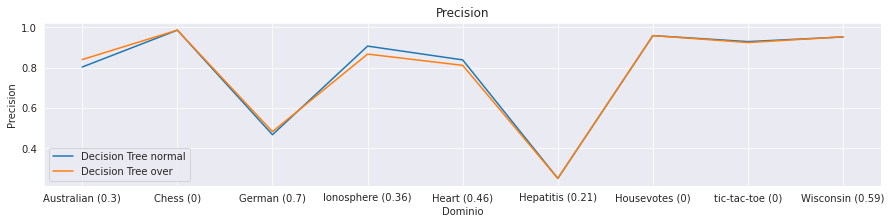

In [60]:
# Create a line chart with two series of data
plt.figure(figsize=(15,3))

plt.plot(precisiondt, label='Decision Tree normal')
plt.plot(precisiondtOver,label='Decision Tree over')


# Add a title and axis labels
plt.title('Precision')
plt.xlabel('Dominio')
plt.ylabel('Precision')


# Set the x-axis ticks and labels
plt.xticks(range(len(domains)), domains)

# Add a legend
plt.legend()

# Show the chart
plt.show()

Precisión similar a la normal con Oversampling, con 1 dominio con resultados superiores y en 2 inferiores.

## Recall normal vs undersampling vs oversampling

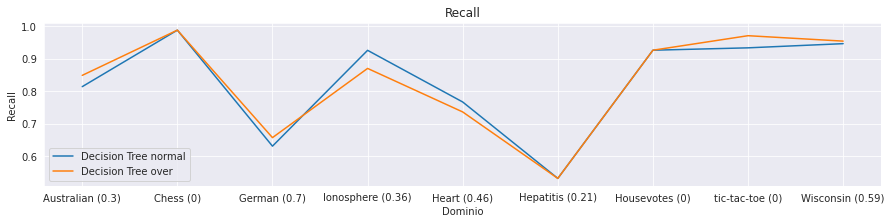

In [62]:
# Create a line chart with two series of data
plt.figure(figsize=(15,3))

plt.plot(recalldt, label='Decision Tree normal')
plt.plot(recalldtOver,label='Decision Tree over')


# Add a title and axis labels
plt.title('Recall')
plt.xlabel('Dominio')
plt.ylabel('Recall')


# Set the x-axis ticks and labels
plt.xticks(range(len(domains)), domains)

# Add a legend
plt.legend()

# Show the chart
plt.show()

El oversampling obtiene un ligero mejor recall en varios dominios pero un resultado bastante peor en Ionosphere (bastante desbalanceado)

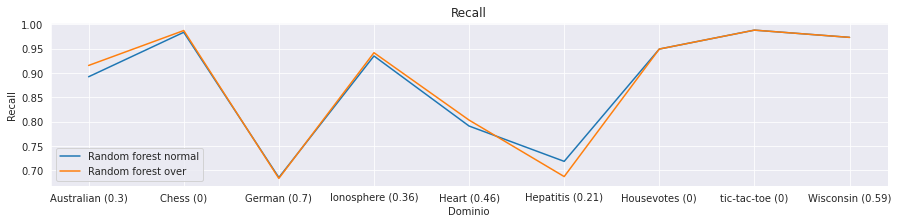

In [63]:
# Create a line chart with two series of data
plt.figure(figsize=(15,3))

plt.plot(recallRf, label='Random forest normal')
plt.plot(recallRfOver,label='Random forest over')


# Add a title and axis labels
plt.title('Recall')
plt.xlabel('Dominio')
plt.ylabel('Recall')


# Set the x-axis ticks and labels
plt.xticks(range(len(domains)), domains)

# Add a legend
plt.legend()

# Show the chart
plt.show()

El recall es similar entre el normal y el oversampled y en Hepatitis es inferior

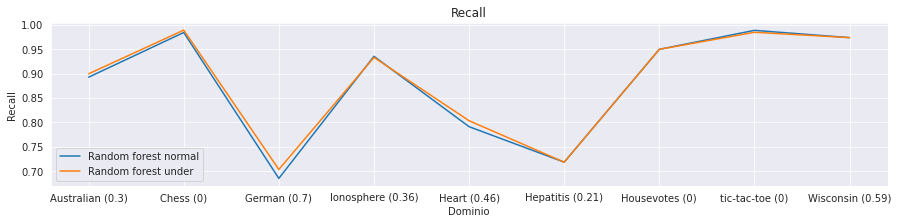

In [64]:
# Create a line chart with two series of data
plt.figure(figsize=(15,3))

plt.plot(recallRf, label='Random forest normal')
plt.plot(recallRfUnder,label='Random forest under')


# Add a title and axis labels
plt.title('Recall')
plt.xlabel('Dominio')
plt.ylabel('Recall')


# Set the x-axis ticks and labels
plt.xticks(range(len(domains)), domains)

# Add a legend
plt.legend()

# Show the chart
plt.show()

Muy similar también

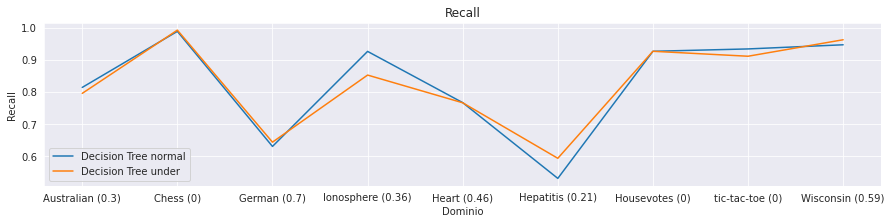

In [65]:
# Create a line chart with two series of data
plt.figure(figsize=(15,3))

plt.plot(recalldt, label='Decision Tree normal')
plt.plot(recalldtUnder,label='Decision Tree under')


# Add a title and axis labels
plt.title('Recall')
plt.xlabel('Dominio')
plt.ylabel('Recall')


# Set the x-axis ticks and labels
plt.xticks(range(len(domains)), domains)

# Add a legend
plt.legend()

# Show the chart
plt.show()